In [ ]:
### Kmeans project tutorial

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from joblib import dump
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

In [17]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
selected_columns = ['Latitude', 'Longitude', 'MedInc']
df_selected = df[selected_columns]


In [19]:
train_data, test_data = train_test_split(df_selected, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [21]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
train_data['Cluster'] = kmeans.fit_predict(train_data_scaled)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
train_data['Cluster'] = kmeans.fit_predict(train_data_scaled)

test_data['Cluster'] = kmeans.predict(test_data_scaled)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
df['Cluster'] = kmeans.predict(scaler.transform(df[selected_columns]))


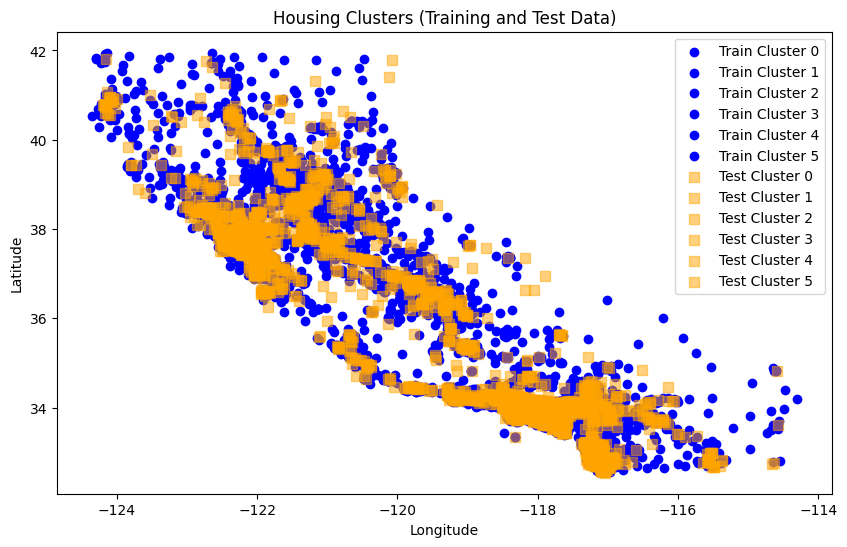

In [24]:
plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    cluster_data_train = train_data[train_data['Cluster'] == cluster]
    plt.scatter(
        cluster_data_train['Longitude'],
        cluster_data_train['Latitude'],
        label=f'Train Cluster {cluster}',
        color='blue',
        alpha=1  
    )

for cluster in range(num_clusters):
    cluster_data_test = test_data[test_data['Cluster'] == cluster]
    plt.scatter(
        cluster_data_test['Longitude'],
        cluster_data_test['Latitude'],
        marker='s',
        s=50,
        label=f'Test Cluster {cluster}',
        color='orange',
        alpha=0.5  
    )

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Clusters (Training and Test Data)')
plt.legend()
plt.show()

In [27]:
X_train = train_data.drop('Cluster', axis=1)
y_train = train_data['Cluster']

X_test = test_data.drop('Cluster', axis=1)
y_test = test_data['Cluster']

classifier = DecisionTreeClassifier(random_state=42)

classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.99


In [26]:
dump(kmeans, open("./models/kmeans.sav", "wb"))
dump(classifier, open("./models/DTClassifier.sav", "wb"))